# Exploratory Data Analysis (EDA) on King County Homes Sales data set



**Objectives**

This is my first EDA project and I will explore the King County Homes Sales data set. It includes homes sold between May 2014 and May 2015. 
With this initial investigations I will gain insight into the dataset and will come up with advice to my imaginary client with respect to her specified requirements.   

**Business case**

I assume to work for a client, Nicole Johnson, who is willing to buy a house in a lively and central neighbourhood in middle price class. At the end of the EDA I will provide her with information about the best timing to buy and which area would be the best to aim for.  


# Getting started

**Setting up the work environment**

First, necessary libraries and the dataset of King County house sales will be imported.

In [1]:
#import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance 
import folium #needed for geoplot
from folium.plugins import HeatMap
import plotly.express as px
from matplotlib.ticker import PercentFormatter




In [2]:
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"}) #customized default setting for matplotlib
plt.rcParams["figure.facecolor"]= "w" #customized default setting for matplotlib
pd.plotting.register_matplotlib_converters()


**Import and understanding data set**

In [3]:
df = pd.read_csv('data/eda.csv') #import dataset
df.head() #check first rows to get a basic understanding of all the data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [4]:
df.tail() #check last rows 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018,21593
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120,21594
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141,21595
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,,0.0,3,8,...,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100,21596
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0,1523300157,21597


In [5]:
df.columns #check which column names are included 

Index(['id         ', 'bedrooms ', 'bathrooms ', 'sqft_living ', 'sqft_lot  ',
       'floors ', 'waterfront ', 'view ', 'condition ', 'grade ',
       'sqft_above ', 'sqft_basement ', 'yr_built ', 'yr_renovated ',
       'zipcode ', 'lat     ', 'long       ', 'sqft_living15 ', 'sqft_lot15 ',
       'date       ', 'price     ', 'house_id   ', 'id'],
      dtype='object')

Some of the column names contain empty spaces, which have to be removed. Unique ID of the house is redundant (first columns and 22nd column) and one can be removed. 'id' (23nd column), which is the sale id is not needed for the analysis and can be dropped as well.

Explanation of individual variables for King County Data Set

|Columns name | Description |
|---- | ------------- |
|house_id|unique identified for a house|
|date | house was sold|
|price| is prediction target|
|bedroomsNumber| # of bedrooms|
|bathroomsNumber| # of bathrooms|
|sqft_livingsquare|footage of the home|
|sqft_lotsquare|footage of the lot|
|floorsTotal|floors (levels) in house|
|waterfront| House which has a view to a waterfront|
|view| quality of view|
|condition| How good the condition is ( Overall )|
|grade| overall grade given to the housing unit, based on King County grading system|
|sqft_above|square footage of house apart from basement|
|sqft_basement|square footage of the basement|
|yr_built|Built Year|
|yr_renovated|Year when house was renovated|
|zipcode| zip|
|lat|Latitude coordinate|
|long|Longitude coordinate|
|sqft_living15|The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|The square footage of the land lots of the nearest 15 neighbors|

In [6]:
df.shape #check shape (means how long and wide it is)

(21597, 23)

In [7]:
df.info() #to check data types and see if there are missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   bedrooms        21597 non-null  float64
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  float64
 4   sqft_lot        21597 non-null  float64
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  object 
 7   view            21597 non-null  object 
 8   condition       21597 non-null  int64  
 9   grade           21597 non-null  int64  
 10  sqft_above      21597 non-null  float64
 11  sqft_basement   21597 non-null  object 
 12  yr_built        21597 non-null  int64  
 13  yr_renovated    21597 non-null  object 
 14  zipcode         21597 non-null  int64  
 15  lat             21597 non-null  float64
 16  long            21597 non-null  float64
 17  sqft_living15   21597 non-null 

*Data types*
* we have the same number of non-null values in each columns and it is the same number as we have rows. This means we have no null values 
* Some datat ypes have to be changed for analysis: sqft_basement to float64, yr_built to Date, Date to Datetime, (yr_renovated to Datetime --> will come back this later if needed)

**Data cleaning**

In [8]:
#remove empty spaces in column names
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [9]:
# Check for Duplicates in house_id 

df.house_id.duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

There are 177 duplicates in house_id, which means that some houses were frequently sold (probably just bought as an investment). We will keep this in mind, but for now duplicates won't be removed from data.

In [10]:
# drop two columns 'id', of which one is the redundant unique house identifier and the other the id of house sales, which is not needed for analysis

df.drop('id', axis =1, inplace=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,3.0,1.00,1180.0,5650.0,1.0,,0.0,3,7,1180.0,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,...,1933,,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510


In [11]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df[df['sqft_basement'] > 0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
5,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,3890.0,...,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,7237550310
8,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,1050.0,...,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,2414600126
10,3.0,2.50,3560.0,9796.0,1.0,,0.0,3,8,1860.0,...,1965,0.0,98007,47.6007,-122.145,2210.0,8925.0,2015-04-03,662500.0,1736800520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,2.0,1.50,1210.0,1278.0,2.0,0.0,0.0,3,8,1020.0,...,2007,0.0,98117,47.6756,-122.375,1210.0,1118.0,2014-11-13,414500.0,2767600688
21574,4.0,3.50,4910.0,9444.0,1.5,0.0,0.0,3,11,3110.0,...,2007,0.0,98074,47.6502,-122.066,4560.0,11063.0,2014-05-14,1220000.0,7430200100
21579,2.0,2.25,1530.0,981.0,3.0,0.0,0.0,3,8,1480.0,...,2006,,98103,47.6533,-122.346,1530.0,1282.0,2014-10-31,520000.0,1972201967
21590,4.0,3.50,3510.0,7200.0,2.0,0.0,0.0,3,9,2600.0,...,2009,0.0,98136,47.5537,-122.398,2050.0,6200.0,2015-03-26,1010000.0,7936000429


Only 8318 houses have a basement.

In [12]:
# transform yr_built to date

df['yr_built'] = df['yr_built'].astype(str).str[:4]
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y', errors='coerce')
df.yr_built.head()


0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [13]:
#transform date to Datetime format

df['date'] = pd.to_datetime(df['date'], format='mixed')

df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

**Descriptive statistics**

In [14]:
df.describe() #get an overview over general statistics 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597,2.159700e+04,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,291.857224,1971-01-01 00:15:16.127239876,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,2014-10-29 04:20:38.171968512,5.402966e+05,4.580474e+09
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,1900-01-01 00:00:00,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00,7.800000e+04,1.000102e+06
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951-01-01 00:00:00,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00,3.220000e+05,2.123049e+09
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975-01-01 00:00:00,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014-10-16 00:00:00,4.500000e+05,3.904930e+09
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997-01-01 00:00:00,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00,6.450000e+05,7.308900e+09
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015-01-01 00:00:00,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00,7.700000e+06,9.900000e+09
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,442.490863,NaN,53.513072,0.138552,0.140724,685.230472,27274.441950,NaN,3.673681e+05,2.876736e+09


From this table with descriptive stats we can assume that some columns will contain outliers. The average house price is 540.000$ and the maximum house price is 7.7 million $, which is much higher than the mean. The maximum number of bedrooms is 33 (which could be a mistake).

In [15]:

df.price.describe() #What would be the middle price range?

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The middle range price will be defined by the IQR (interquartile range) and would range from 322000 (25% quartile) to 645000 (75% quartile).

**Price range and distribution**

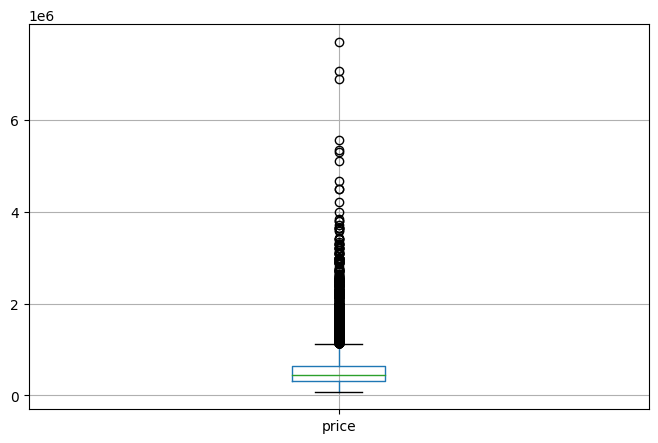

In [16]:
df.boxplot(column = 'price') #boxplot of price range 
plt.yticks(range(0, 7000001, 2000000))
plt.show()

The price range is huge and there are many outliers with extreme values. For this business case we will focus only on the middle-price range house (we will take the interquartile range of 'price'), by which all the outlier will be excluded.

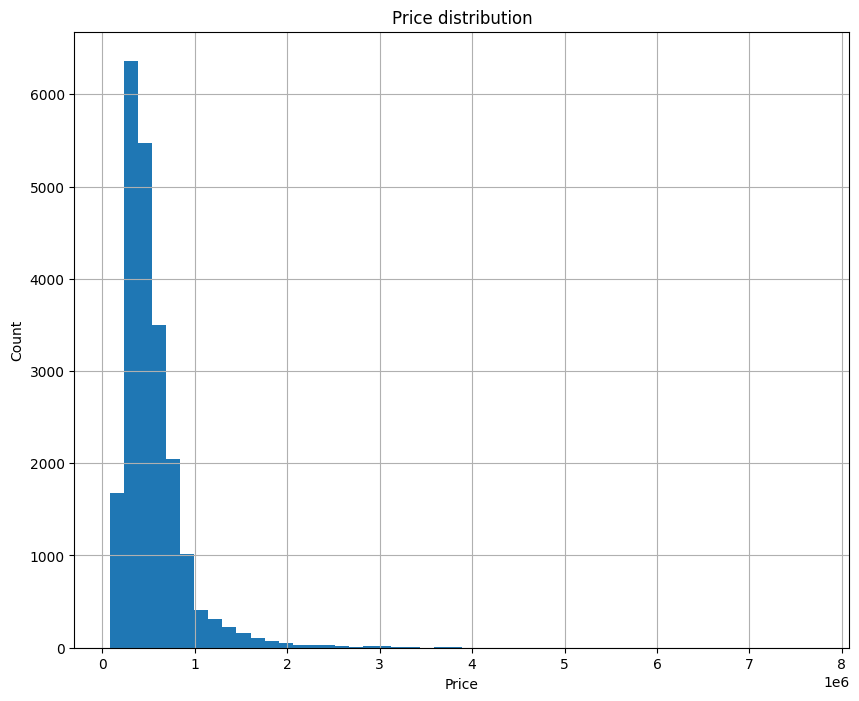

In [17]:
#histgram to show price distribution 
df.hist(column = 'price', bins = 50, figsize = (10, 8))
#labels and title
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price distribution')
plt.show()


The distribution of prices is positively/right skewed. 

***Distribution of numeric variables of interest***

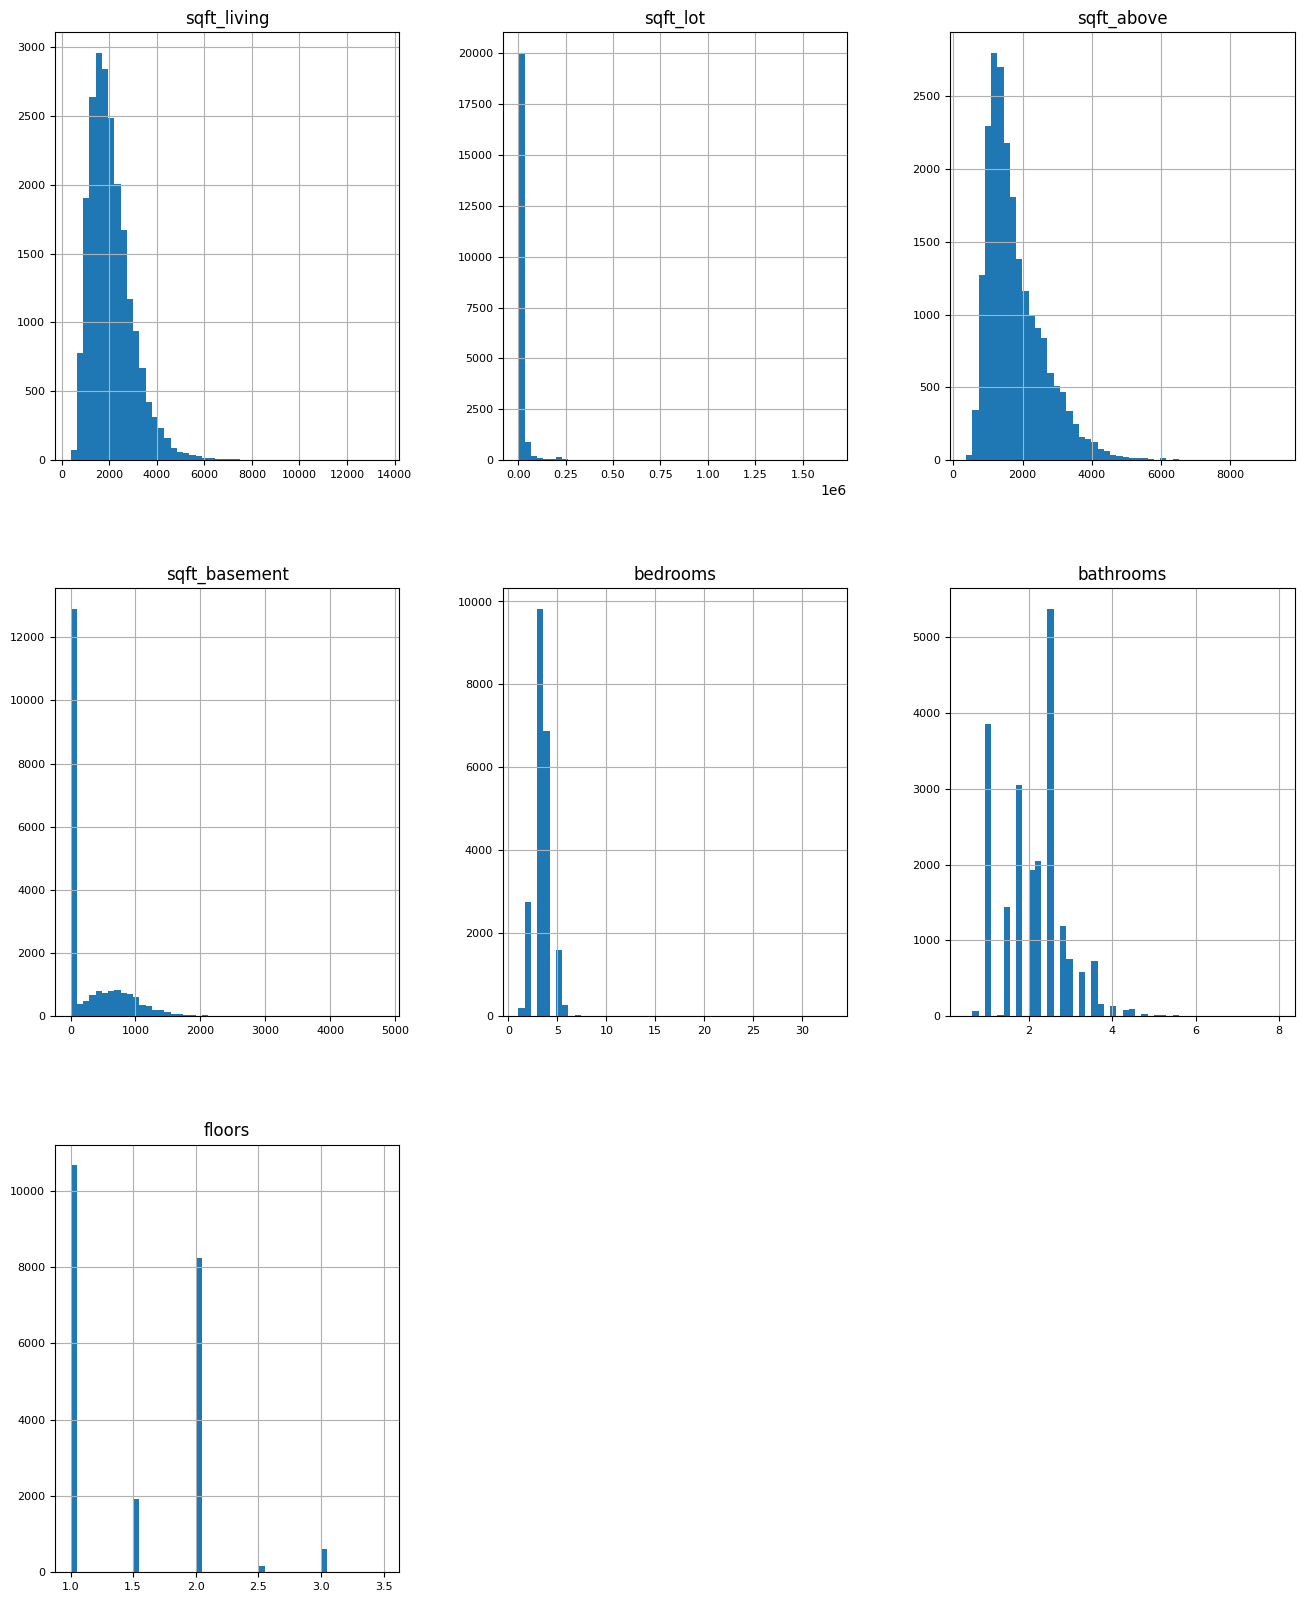

In [18]:
#select columns of interest
columns_of_interest = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']

# Plot histograms
df[columns_of_interest].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Living space (sqft living, sqft above) is positively skewed. 

**Checking for correlations**

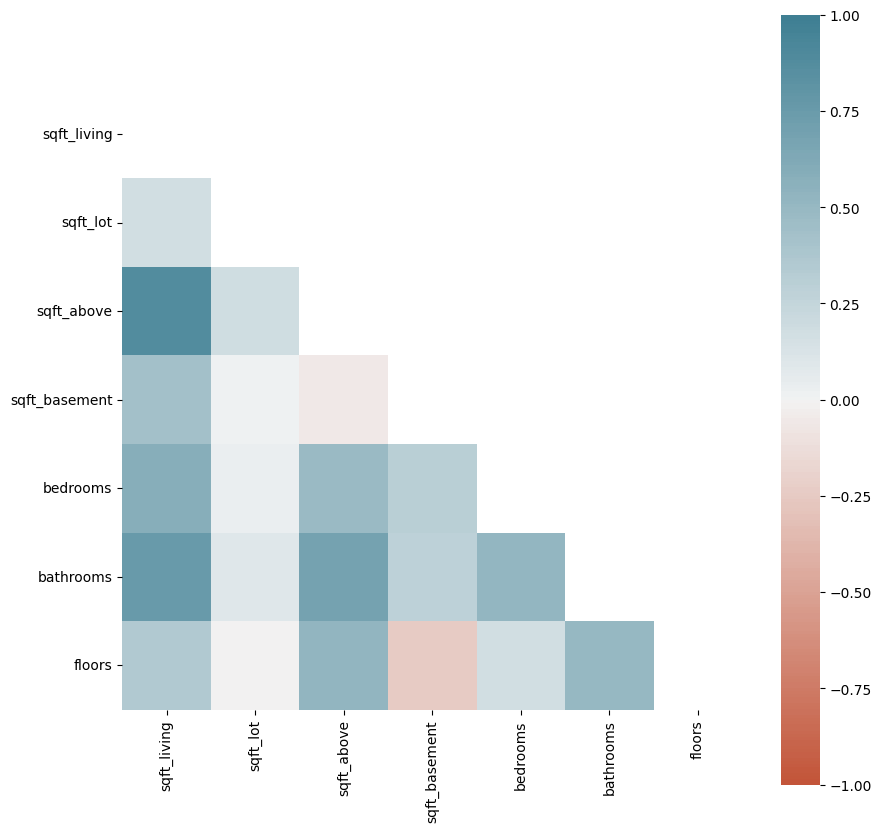

In [19]:
# Calculate correlation matrix
data_corr = df[columns_of_interest].corr()

# Generate a mask for the upper triangle to remove it
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Heatmap
sns.heatmap(data_corr, 
            mask=mask,
            xticklabels=data_corr.columns.values, # x labels
            yticklabels=data_corr.columns.values, # y labels
            vmin=-1, # color scale the min value
            vmax=1, # color scale the max
            center=0, # color scale place at the center at 0
            cmap=sns.diverging_palette(20, 220, n=200), # color palette
            square=True) # quare-shaped cells

plt.show()

Living space (sqft_living, sgft_above) and grade correlate with the price. sqft_living positively correlates wth sqft_above.

As the correlation matrix does not describe the relationship between data and might be affected by outliers, I will plot scatter plots to show the relationship between the price and the features of interest ('sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'). This will give more insight about the linear relationship between the price and the selected features.

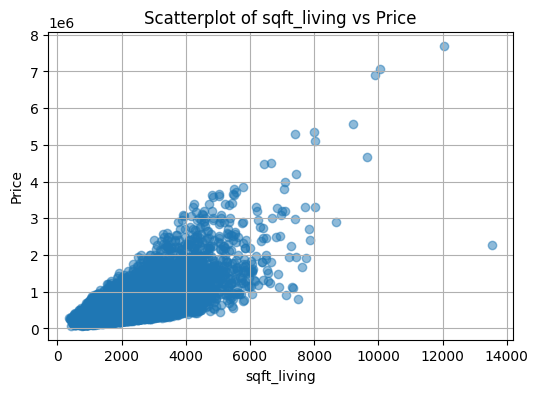

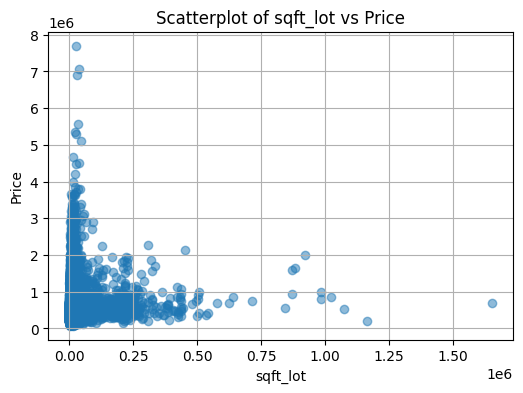

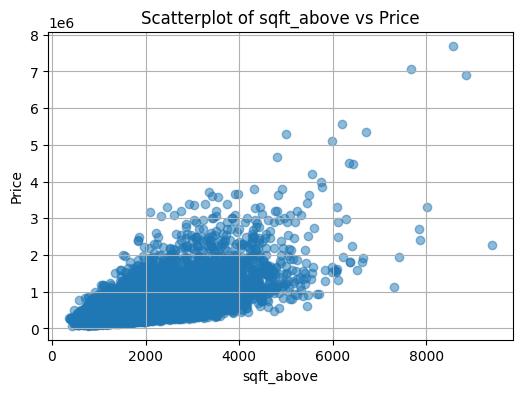

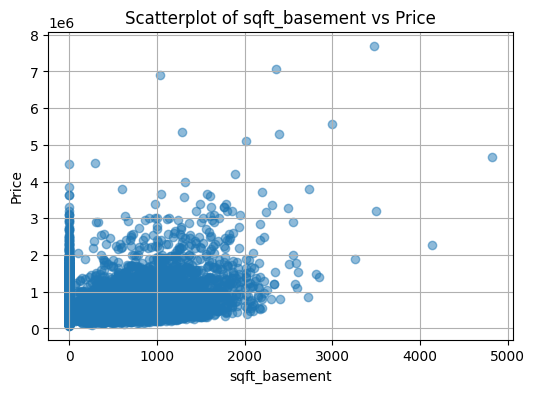

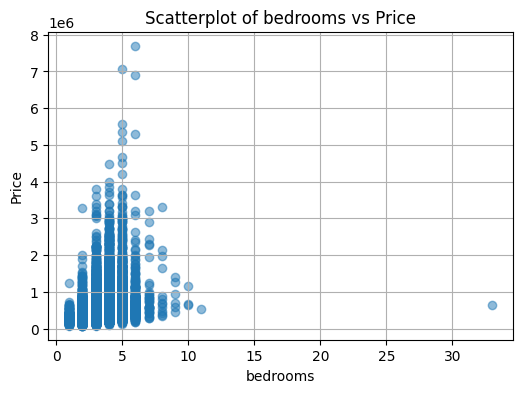

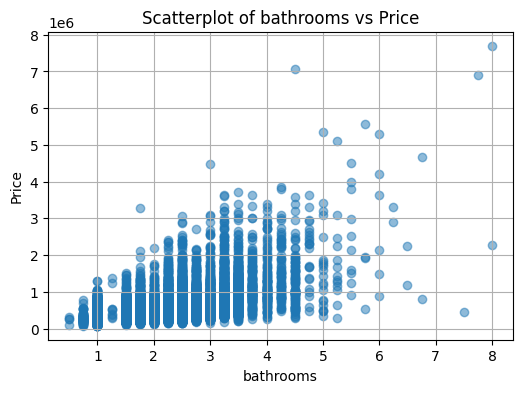

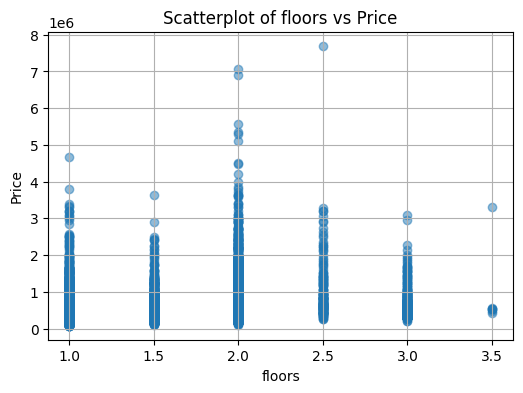

In [20]:
# Create scatterplots for each column against 'price'
for col in columns_of_interest:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['price'], alpha=0.5)
    plt.title(f'Scatterplot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

The scatterplots show a linear relationship between the living space (sqft_living and sqft_above) and the price. As most houses do not have a basement, many data point are at x=0 and the relationship between price and sqft_basement is weak.  

Houses with 3- 5 bedrooms seem to be more expensive. 

# Initial Hypotheses and assumptions about dataset

| Question | Hyothesis |
| ---------|-----------|
| Which lively and central area is still affordable for a budget in middle price range?| The closer to the city center, the more expensive| 
|Does timing affect the price?| House prices fluctuate over the year and are lowest in seasons with low number of solds|
|Do some areas have a better price performance?| Some areas offer a lower price per sqft|

# Selecting only houses that are of interest for the client

Houses with the following criteria are of interest for the client:  

* middle price class --> in interquartile range of prices of all house sales in King County
* areas close to the city center 

In [21]:
# houses in middle price class

# Calculate the lower and upper quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select houses within the interquartile range
df_middle_price = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In the next step only houses in central areas will be selected. We defined central areas around the radius of 3 miles around the city center (with coordiantes: 47.620564, -122.350616). Additionally, the "distance to city center" will be added as a new feature to the list.

In [22]:
# Find central areas

#using geopy library to calculate distances between zipcodes and the city center (pre-defined city center by coodinates)


#Define coordinates of the city center 
city_center_coordinates = (47.620564, -122.350616 )


# Calculation of distance between two coordinates
def calc_dist(house_coordinates):
    return distance(city_center_coordinates, house_coordinates).miles

# Iterate through dataset and filter houses close to the city center
central_houses = []
for index, row in df_middle_price.iterrows():
    house_coordinates = (row['lat'], row['long'])
    distance_to_city_center = calc_dist(house_coordinates)
    if distance_to_city_center <= 3:
        row['distance_to_city_center'] = distance_to_city_center #adding distance_to_city_center as new feature to list for further analysis
        central_houses.append(row)

#convert to DataFrame
central_houses_df = pd.DataFrame(central_houses)



**Are houses with closer proximity to city center more expensive?**
Only houses of interest are included  (in a 3 miles-radius around the city center AND in middle price range)

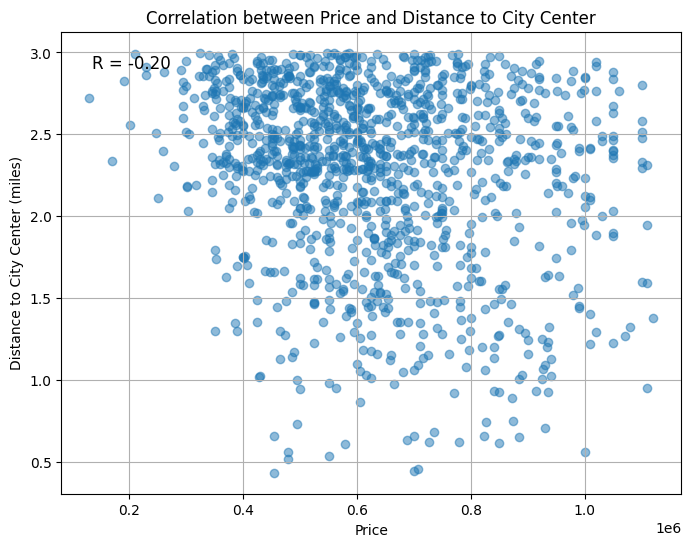

In [23]:
#Define x and y 
x = central_houses_df['distance_to_city_center']
y = central_houses_df['price']

# Correlation coefficient between price and distance_to_city_center
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(central_houses_df['price'], central_houses_df['distance_to_city_center'], alpha=0.5)
plt.title('Correlation between Price and Distance to City Center')
plt.xlabel('Price')
plt.ylabel('Distance to City Center (miles)')
plt.grid(True)

# Annotate plot with correlation coefficient
plt.text(0.05, 0.95, 'R = {:.2f}'.format(correlation_coefficient), transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')

plt.show()

Within the radius of 3 miles around the city center, the price does not correlate with the distance to the city centers. Some neighbourhoods might be more expensive due to other factors like popularity/infrastructure/houses in better conditions.

***Visualization of central houses in Geomap***  
1. Heatmap using folium shows the most popular areas (with the most house sales)

In [24]:
zipcode_lst = (central_houses_df.zipcode.unique()) #check for individual zipcodes 
print(zipcode_lst)

[98119 98112 98122 98199 98102 98109 98107 98103 98144 98116 98105 98126]


In [25]:
# create a base map of Central area of King County  
basemap = folium.Map(location=[central_houses_df['lat'].mean(),central_houses_df['long'].mean()], zoom_start = 11)

# add heatmap to show housing density
coordinate_copy = central_houses_df[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

***Select houses that are in a lively area***  

All the areas located around the city center in the defined 3-miles radius seem to be densely populated and will be considered for the client.

2. Using scatter_mapbox to show where houses are more expensive or more affordable.

In [26]:
# Plots the main figure
fig = px.scatter_mapbox(
    central_houses_df,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=10,
    mapbox_style='open-street-map', 
    color='price',  
    hover_name='price',
    hover_data={"zipcode": True, 
                "price": True, 
                "long": False,
                "lat": False},
    
    template='plotly_dark')

# updates markers and tooltips
fig.update_traces(hovertemplate =
            '<b>' + central_houses_df.zipcode.astype('str') + '</b><br>' 

                )

# updating height, width, margins and other layout properties
fig.update_layout(
    width=700,
    height=500,
    title_font_size=28,
    margin=dict(l=0, r=0, t=60, b=0),  # Set margins to zero (pixels)
    title={
        'text': "Central houses Seattle in middle price range",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

**When is the best timing to buy a house in these areas?**

1. Create new features 'year_sold' and 'month sold' by extracting year and month from the sold date ('date')

In [27]:
#transform date to Datetime format

central_houses_df['date'] = pd.to_datetime(central_houses_df['date'], format='mixed')



#extract year and month of sold date
central_houses_df['year_sold'] = central_houses_df['date'].dt.year # extract only year
central_houses_df['month_sold'] = central_houses_df['date'].dt.month# extract only month
central_houses_df['year_sold'] = central_houses_df['year_sold'].astype(str) #convert year to string
central_houses_df = central_houses_df.sort_values('month_sold')



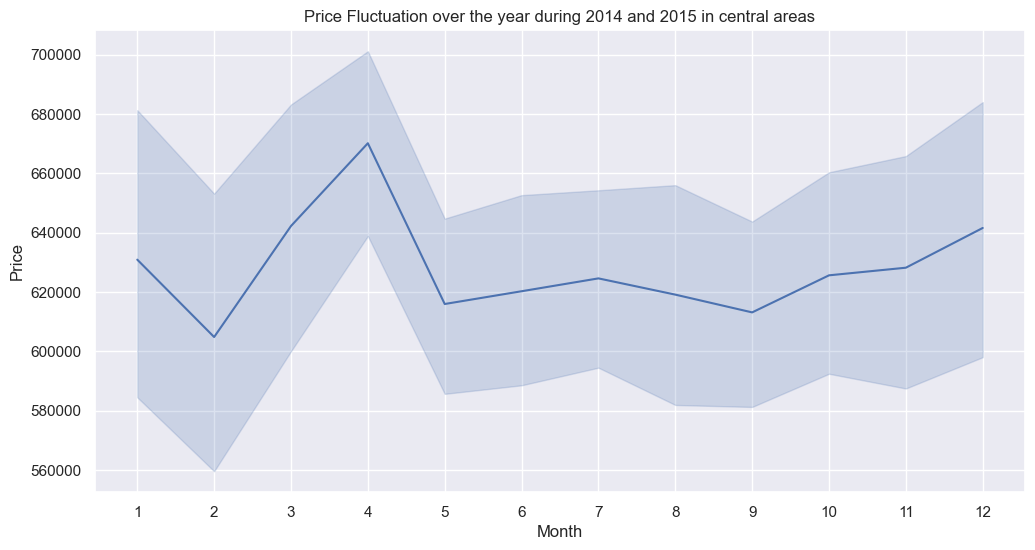

In [28]:

#plotting price fluctuation over the year 
sns.set_theme(style="darkgrid")


# Plot 
plt.figure(figsize=(12, 6))
sns.lineplot(x="month_sold", y="price",
             data=central_houses_df)
plt.title('Price Fluctuation over the year during 2014 and 2015 in central areas')
plt.xlabel('Month')
plt.ylabel('Price')

#xtick intervals
plt.xticks(range(1,13))

plt.show()

House prices seem to fluctuate over the year and some months seem to be more expensive than others. But does this correlate with the number of house sales? Are houses more expensive in months, where many house were sold?

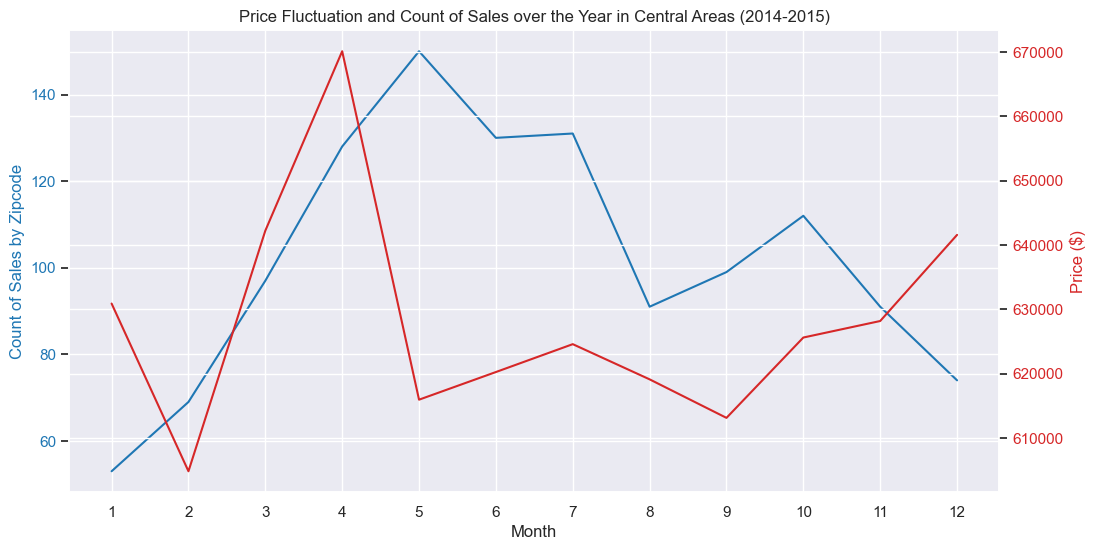

In [29]:
# Sample data (replace this with your actual data)
zipcode_sales = central_houses_df.groupby('month_sold')['zipcode'].count()
price_data = central_houses_df.groupby('month_sold')['price'].mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot count of sales by zipcode
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Count of Sales by Zipcode', color=color)
ax1.plot(zipcode_sales.index, zipcode_sales.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
#xtick intervals
plt.xticks(range(1,13))

# Create a secondary y-axis for price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price ($)', color=color)
ax2.plot(price_data.index, price_data.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Price Fluctuation and Count of Sales over the Year in Central Areas (2014-2015)')
plt.show()

House sales increased from february to april, as well as the prices. But prices fell after april, while the number of sales stayed high. No regular pattern of number of house sales and price can be estimated from this short-term analyis.

**Does price increase by year?**

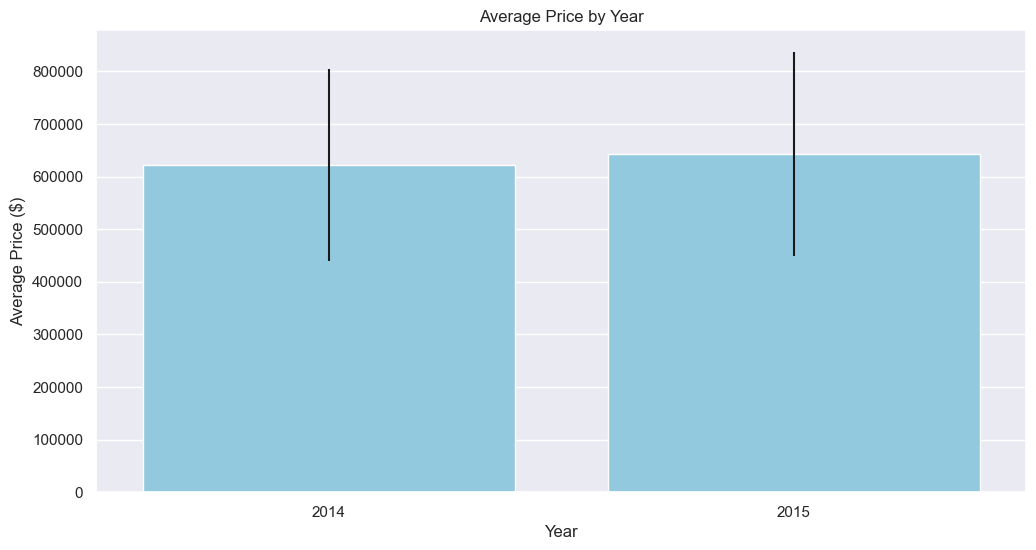

In [30]:
# Calculate average price and standard deviation for each year
average_prices_by_year = central_houses_df.groupby('year_sold')['price'].agg(['mean', 'std']).reset_index()

# Set the seaborn style
sns.set_theme(style="darkgrid")

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x="year_sold", y="mean",
            data=average_prices_by_year, 
            color='skyblue',  # Set color of bars to skyblue
            yerr=average_prices_by_year['std'],  # Set error bars to standard deviation
            capsize=6)  # Set the capsize of error bars

plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks ([0, 1], ['2014', '2015'])
plt.show()

House prices did not increase much from 2014 to 2015. 

**Which central areas are more affordable for middle price range?**

I will provide a list of zipcodes ordered by average price to show a ranking of most affordable central areas.

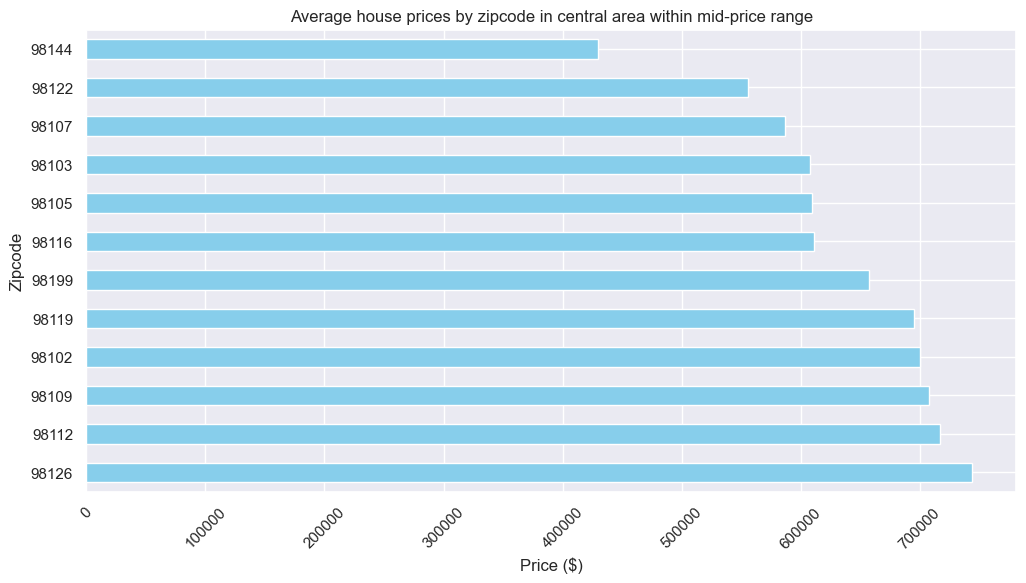

In [31]:

# Group by zipcode and calculate the average price
average_price_by_zipcode = central_houses_df.groupby("zipcode")["price"].mean()

# Sort average prices in descending order
average_price_by_zipcode_sorted = average_price_by_zipcode.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
average_price_by_zipcode_sorted.plot(kind="barh", color="skyblue")
plt.title("Average house prices by zipcode in central area within mid-price range")
plt.xlabel("Price ($)")
plt.ylabel("Zipcode")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Which areas offer the best price per sqft (living space)?**

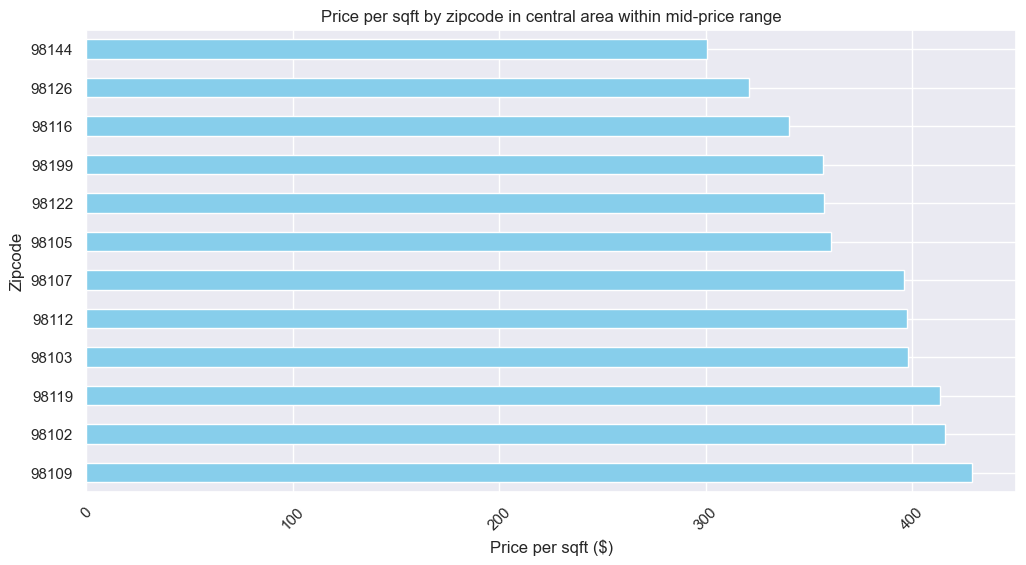

In [32]:
# add new feature 'price per sqft'

central_houses_df['price_per_sqft'] = central_houses_df['price']/central_houses_df['sqft_living']
central_houses_df.head()

# Group by zipcode and calculate the average price
price_per_sqft_by_zipcode = central_houses_df.groupby("zipcode")["price_per_sqft"].mean()

# Sort average prices in descending order
price_per_sqft_by_zipcode_sorted = price_per_sqft_by_zipcode.sort_values(ascending=False)

#create bar plot for ranking cheapest to most expensive
plt.figure(figsize=(12, 6))
price_per_sqft_by_zipcode_sorted.plot(kind="barh", color="skyblue")
plt.title("Price per sqft by zipcode in central area within mid-price range")
plt.xlabel("Price per sqft ($)")
plt.ylabel("Zipcode")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





In [33]:
central_houses_df.price_per_sqft.describe() #check descrptive statistics of price per sqft

count    1225.000000
mean      380.782805
std       100.561095
min       108.333333
25%       313.333333
50%       370.370370
75%       436.305732
max       766.393443
Name: price_per_sqft, dtype: float64

The mean of price per sqft in the central area (of houses in middle price range) is 370$. All houses below the average price per sqft will be visualized in a map to better visualize the areas with the best price per sqft.

**Where are the houses with the lowest price per sqft located on the map?**

In [34]:

# Find the zipcodes with houses below average price per sqft 

best_sqft_zipcode = central_houses_df[central_houses_df['price_per_sqft'] <= central_houses_df['price_per_sqft'].mean()]

# Plots the main figure
fig = px.scatter_mapbox(
    best_sqft_zipcode,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=10,
    mapbox_style='open-street-map', 
    color='price_per_sqft',  
    hover_name='price_per_sqft',
    hover_data={"zipcode": True, 
                "price": True, 
                "long": False,
                "lat": False},
    
    template='plotly_dark'
)

# updates markers and tooltips
fig.update_traces(hovertemplate =
            '<b>' + best_sqft_zipcode.zipcode.astype('str') + '</b><br>'
            '<b>' + best_sqft_zipcode.price_per_sqft.astype('str') + '</b><br>'  

                )

# updating height, width, margins and other layout properties
fig.update_layout(
    width=700,
    height=500,
    title_font_size=28,
    margin=dict(l=0, r=0, t=60, b=0),  # Set margins to zero (pixels)
    title={
        'text': "Houses with lowest price per sqft",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

***Finding a way to rank the areas representing the best price performance ratio***

Using a combined metric score that should represent the living space in relation to price with the highest grade. Calculation: sqft_living/price * grade. 

In [35]:
# Group by zipcode and calculate the maximum living space, maximum grade, and minimum price
zipcode_stats = central_houses_df.groupby("zipcode").agg({
    "sqft_living": "max",
    "grade": "max",
    "price": "min"
}).reset_index()

# Calculate the combined metric (square footage / price * grade)
zipcode_stats['combined_metric'] = (zipcode_stats['sqft_living'] / zipcode_stats['price']) * zipcode_stats['grade']

# Sort the zipcodes based on the combined metric
sorted_zipcodes = zipcode_stats.sort_values(by='combined_metric', ascending=True)

# Select the top areas/zipcodes with the biggest square footage and highest grade for the smallest price
top_zipcodes = sorted_zipcodes.head(12)  # Select top 12 zipcodes

# Print the top_zipcodes DataFrame to inspect the selected zipcodes
print(top_zipcodes)

    zipcode  sqft_living  grade     price  combined_metric
2     98105       2420.0      9  433000.0         0.050300
3     98107       2860.0      8  373500.0         0.061258
4     98109       3370.0     10  410500.0         0.082095
1     98103       3330.0      9  339950.0         0.088160
0     98102       3730.0     10  350000.0         0.106571
9     98126       3610.0     10  295000.0         0.122373
11    98199       4060.0     10  323000.0         0.125697
7     98119       4460.0     10  300523.0         0.148408
10    98144       2880.0     10  190500.0         0.151181
8     98122       4000.0     10  202000.0         0.198020
5     98112       3990.0     10  169317.0         0.235653
6     98116       3520.0      9  130000.0         0.243692


<Figure size 1200x600 with 0 Axes>

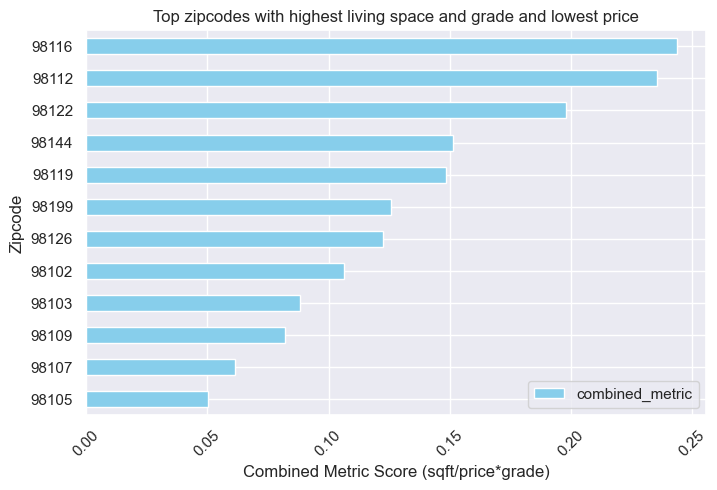

In [36]:
# Create a bar plot of metric score by zipcode
x = top_zipcodes['zipcode']
y = top_zipcodes['combined_metric']

plt.figure(figsize=(12, 6))
top_zipcodes.plot(x='zipcode', y='combined_metric', kind="barh", color="skyblue")
plt.title("Top zipcodes with highest living space and grade and lowest price")
plt.xlabel("Combined Metric Score (sqft/price*grade)")
plt.ylabel("Zipcode")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Conclusion and recommendations for the client

* The middle price range in King County is between 322000-645000$, when taking the interquartile range of the prices of all house sales in King County. Within a radius of 3 miles around the city center, it is still possible to find affordable houses in a middle-price range budget. 
* House prices fluctuate over the year and some seasons are higher priced than others. By plotting average prices by months of the two last years, it seems that february-april is the highest priced season. Although house prices are dependent on several factors e.g. market factors like demand, offer or economic factors like employment rate, which were not considered in this short-term analysis. 
* House prices around the city center do not correlate with proximity to city center. Some neighbourhoods are more popular than others. 
* Zipcode 98144 has the lowest price per sqft 
* Zipcode 91809 has the highest price per sqft
* Most houses with a low price per sqft are located east to the city center 
* Zipcode 98116 (West Seattle) offers the best graded houses AND biggest living space for the smallest price


***Advice to the client***
* Radius of 3 miles around the city center offers affordable homes
* Consider to buy in West Seattle or East of the city centre to get more living space and good grade at lowest price
* Best timing to buy is in January or from May-September to avoid highly-priced seasons